In [1]:
#imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

# Part One

**1. Question**

In [2]:
#1
# Find the joint probability of the people who planned to purchase and actually placed an order

print(f'Probability of the people who planned to purchase and actually placed an order: {400/2000}')

Probability of the people who planned to purchase and actually placed an order: 0.2


In [3]:
#2
# Find the joint probability of the people who planned to purchase and actually placed an order, given that people 
# planned to purchase

print(f'Probability of the people who planned to purchase and actually placed an order, given that people planned to purchase: {400/500}')

Probability of the people who planned to purchase and actually placed an order, given that people planned to purchase: 0.8


**2. Question**

In [4]:
#Given
p = 0.05
n = 10

x = np.arange(0,10)

#calculate
cdf = stats.binom.cdf(x, n, p)
pmf = stats.binom.pmf(x, n, p)

In [5]:
#a
# Probability that none of the items are defective?
print(f'Probability that none of the items are defective: {round(cdf[0], 4)}')

Probability that none of the items are defective: 0.5987


In [6]:
#b
# Probability that exactly one of the items is defective?
print(f'Probability that exactly one of the items is defective: {round(pmf[1], 4)}')

Probability that exactly one of the items is defective: 0.3151


In [7]:
#c
# Probability that two or fewer of the items are defective?
print(f'Probability that two or fewer of the items are defective: {round(cdf[2], 4)}')

Probability that two or fewer of the items are defective: 0.9885


In [8]:
#d
# Probability that three or more of the items are defective ?
print(f'Probability that three or more of the items are defective: {round((1 - cdf[2]), 4)}')

Probability that three or more of the items are defective: 0.0115


**3. Question**

In [9]:
#Given
lambda_avg = 3

x = np.arange(0, 10)

#calculate
cdf = stats.poisson.cdf(x, lambda_avg)
pmf = stats.poisson.pmf(x, lambda_avg)

In [10]:
#a
# Probability that in a given week he will sell some cars.
print(f'Probability that in a given week he will sell some cars: {round((1 - cdf[0]), 4)}')

Probability that in a given week he will sell some cars: 0.9502


In [11]:
#b
# Probability that in a given week he will sell 2 or more but less than 5 cars.
#sol: P(he will sell 2 cars) + P(he will sell 3 cars) + P(he will sell 4 cars)

p1 = pmf[2] 
p2 = pmf[3] 
p3 = pmf[4]

print(f'Probability that in a given week he will sell 2 or more but less than 5 cars: {round((p1+p2+p3), 4)}')

Probability that in a given week he will sell 2 or more but less than 5 cars: 0.6161


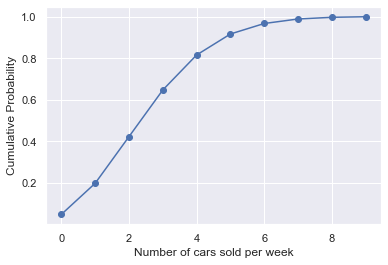

In [12]:
#c
# Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per-
# week.
plt.plot(x, cdf, 'o-')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Probability')
plt.show()

**4. Question**

In [13]:
#Given
p = 0.868
n = 3

x = [0, 1, 2, 3]

pmf = stats.binom.pmf(x, n, p)

In [14]:
#a
# What is the probability that all three orders will be recognised correctly?
print(f'Probability that all three orders will be recognised correctly: {round(pmf[3], 4)}')

Probability that all three orders will be recognised correctly: 0.654


In [15]:
#b
# What is the probability that none of the three orders will be recognised correctly?
print(f'Probability that none of the three orders will be recognised correctly: {round(pmf[0], 4)}')

Probability that none of the three orders will be recognised correctly: 0.0023


In [16]:
#c
# What is the probability that at least two of the three orders will be recognised correctly?
print(f'Probability that at least two of the three orders will be recognised correctly: {round((pmf[2]+pmf[3]), 4)}')

Probability that at least two of the three orders will be recognised correctly: 0.9523


**5. Question**

In [17]:
#Given
n = 300
mu = 60
sigma = 12

In [18]:
#a
# What is the percentage of students who score more than 80.

print(f'Percentage of students who score more than 80: {round((1 - stats.norm.cdf(80, loc=60, scale=12)), 4) * 100}%')

Percentage of students who score more than 80: 4.78%


In [19]:
#b
# What is the percentage of students who score less than 50.
print(f'Percentage of students who score less than 50: {round(stats.norm.cdf(49, loc=60, scale=12), 4) * 100}%')

Percentage of students who score less than 50: 17.97%


In [20]:
#c
# What should be the distinction mark if the highest 10% of students are to be awarded distinction?

z=1.282 #As 90% students should be below the distinction mark

# as per the standardization formula in normal distribution
#z = (x-mu)/sigma

x = (z*sigma)+mu
print(f'The distinction mark if the highest 10% of students are to be awarded distinction: {round(x)}')


The distinction mark if the highest 10% of students are to be awarded distinction: 75


**6. Question**

**Explain 1 real life industry scenario [other than the ones mentioned above] where you can use the concepts learnt in this module of Applied statistics to get a data driven business solution.**

Answer:
The Binomial distribution can be used in Bank or insurance industry to get an idea of the proportions of customers, who are satisfied with the service quality.
Suppose it's known that 5% of the customers who take a certain investment plan are satisfied with the service provided by the bank or investment company. Then, we can use binomial distribution to find the probability of a certain number of customers from a random sample of 100 will be satisfied or not by the service provided.

# Part Two

## Import the Data set

**By looking at the data from csv file, it's clear that hyphen(-) symbol is being used for missing data. So, we can replace the hyphen symbol with NaN while loading the data for the ease of identifying the missing data and deal with it during pre-processing**

In [21]:
basketBallData = pd.read_csv('DS - Part2 - Basketball.csv', na_values='-')

## Check the data head

In [22]:
basketBallData.head()

Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1  Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
2  Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
3  Team 4          82  3386.0       2664.0    1187.0       616.0      861.0   
4  Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   

   BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
0        5947.0       3140.0                33.0       23.0       1929   
1        5900.0       3114.0                25.0       25.0       1929   
2        4534.0       3309.0                10.0        8.0       1929   
3        4398.0       3469.0                 6.0        6.0   1931to32   
4        4631.0       3700.0                 8.0        7.0       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

## Basic info about the data 

In [23]:
basketBallData.info()
# As we can see there are few missing values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   9 non-null      float64
 10  Runner-up            13 non-null     float64
 11  TeamLaunch           61 non-null     object 
 12  HighestPositionHeld  61 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ KB


**Missing Values**
* The TournamentChampion and Runner-up columns are having most of the missing data.
* One row/Team from the data set is not having the required values(i.e. Score, Played games, won games etc.), which are required for EDA. 

In [24]:
basketBallData.isnull().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

## Data Pre-Processing

It's possible that out of all the teams only few teams have reached the final of a tournament, hence there are missing data for the columns **Tournament Champion** and **Runner-up**.

So, we can replace the missing values with Zero(0) for the ease of analysis.

In [25]:
basketBallData['TournamentChampion'].fillna(value=0, inplace=True)
basketBallData['Runner-up'].fillna(value=0, inplace=True)

In [26]:
basketBallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   61 non-null     float64
 10  Runner-up            61 non-null     float64
 11  TeamLaunch           61 non-null     object 
 12  HighestPositionHeld  61 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ KB


Now, we can see there is only one row/team which has missing data for the columns **Score, PlayedGames, WonGames, DrawnGames, LostGames,BasketScored and BasketGiven**. This particular row/Team can not be considered for our analysis as we need all these column values to be able to analyse whether this team should be approached by the company or not. 

Hence, We should drop this row/team from the data.

In [27]:
basketBallData.dropna(inplace=True)

In [28]:
basketBallData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 60 non-null     object 
 1   Tournament           60 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   60 non-null     float64
 10  Runner-up            60 non-null     float64
 11  TeamLaunch           60 non-null     object 
 12  HighestPositionHeld  60 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 6.6+ KB


From the data, it's clear that **TeamLaunch** column holds the year when the respective team was launched on professional basketballs. So, the columns should have been numeric but the data type of the column is being shown as object.

Hence, we need to analyse the data of the columns and correct if something is wrong.

In [29]:
basketBallData['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

From the above output, it's clear there are few values which have data for teams which were launched on professional basketball over multiple years.

We can consider the end year of launching for our data analysis. Hence, we'll modify the column to hold only the last year of launching of teams.

In [30]:
def calculate_end_year(start_year, end_year):
    if start_year[2:] == '99':
        return str(int(start_year)+1+int(end_year))
    else:
        return start_year[:2]+end_year

def convert_year(year_data):
    temp_year = []
    for year in year_data:
        if year.find('-') != -1 or year.find('_') != -1 or year.find('~') != -1:
            temp_year.append(calculate_end_year(year[:4], year[5:]))
        elif year.find('to') != -1:
            temp_year.append(calculate_end_year(year[:4], year[6:]))
        else:
            temp_year.append(year)
    
    return temp_year

basketBallData['TeamLaunch'] = convert_year(basketBallData['TeamLaunch'])

In [31]:
basketBallData.head()

Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1  Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
2  Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
3  Team 4          82  3386.0       2664.0    1187.0       616.0      861.0   
4  Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   

   BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
0        5947.0       3140.0                33.0       23.0       1929   
1        5900.0       3114.0                25.0       25.0       1929   
2        4534.0       3309.0                10.0        8.0       1929   
3        4398.0       3469.0                 6.0        6.0       1932   
4        4631.0       3700.0                 8.0        7.0       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

## Calculating Percentage of Won Games and Lost Games

We can calculate the rate of won games, drawn games and lost games for each team using the values from **PlayedGames, WonGames,DrawnGames,LostGames** which will help in our EDA.

In [32]:
basketBallData = basketBallData.assign(Winning_Percentage = lambda x: round((x['WonGames']/x['PlayedGames']*100)))
basketBallData = basketBallData.assign(Drawn_Percentage = lambda x: round((x['DrawnGames']/x['PlayedGames']*100)))
basketBallData = basketBallData.assign(Lost_Percentage = lambda x: round((x['LostGames']/x['PlayedGames']*100)))

basketBallData.head()

Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1  Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
2  Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
3  Team 4          82  3386.0       2664.0    1187.0       616.0      861.0   
4  Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   

   BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
0        5947.0       3140.0                33.0       23.0       1929   
1        5900.0       3114.0                25.0       25.0       1929   
2        4534.0       3309.0                10.0        8.0       1929   
3        4398.0       3469.0                 6.0        6.0       1932   
4        4631.0       3700.0                 8.0        7.0       1929   

   HighestPositionHeld  Winning_Percentage  Drawn_Percentage  Lost_Percentage  
0                    1                60.0              20.0             20.0  
1                    1                57.0              21.0             22.0  
2                    1                47.0              23.0             30.0  
3                    1                45.0              23.0             32.0  
4                    1                44.0              23.0             33.0

**Basic Statistical Details**

In [33]:
basketBallData.describe().T

count         mean          std   min     25%    50%  \
Tournament            60.0    24.383333    26.884620   1.0    4.00   12.0   
Score                 60.0   916.450000  1138.342899  14.0  104.25  395.5   
PlayedGames           60.0   810.100000   877.465393  30.0  115.50  424.5   
WonGames              60.0   309.033333   408.481395   5.0   34.75  124.0   
DrawnGames            60.0   192.083333   201.985508   4.0   26.25   98.5   
LostGames             60.0   308.816667   294.508639  15.0   62.75  197.5   
BasketScored          60.0  1159.350000  1512.063948  34.0  154.50  444.0   
BasketGiven           60.0  1159.233333  1163.946914  55.0  236.00  632.5   
TournamentChampion    60.0     1.450000     5.515540   0.0    0.00    0.0   
Runner-up             60.0     1.433333     4.574679   0.0    0.00    0.0   
HighestPositionHeld   60.0     7.050000     5.315232   1.0    3.00    6.0   
Winning_Percentage    60.0    31.316667     7.853514  17.0   27.75   30.5   
Drawn_Percentage      60.0    23.650000     4.512976  11.0   22.00   24.0   
Lost_Percentage       60.0    45.000000     8.417093  20.0   41.00   46.0   

                         75%     max  
Tournament             39.00    86.0  
Score                1360.50  4385.0  
PlayedGames          1345.50  2762.0  
WonGames              432.75  1647.0  
DrawnGames            331.50   633.0  
LostGames             563.50  1070.0  
BasketScored         1669.75  5947.0  
BasketGiven          2001.25  3889.0  
TournamentChampion      0.00    33.0  
Runner-up               0.00    25.0  
HighestPositionHeld    10.00    20.0  
Winning_Percentage     33.25    60.0  
Drawn_Percentage       26.00    39.0  
Lost_Percentage        49.00    70.0

In [34]:
basketBallData['Team'].nunique()

60

In [35]:
basketBallData['Team'].unique()

array(['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6',
       'Team 7', 'Team 8', 'Team 9', 'Team 10', 'Team 11', 'Team 12',
       'Team 13', 'Team 14', 'Team 15', 'Team 16', 'Team 17', 'Team 18',
       'Team 19', 'Team 20', 'Team 21', 'Team 22', 'Team 23', 'Team 24',
       'Team 25', 'Team 26', 'Team 27', 'Team 28', 'Team 29', 'Team 30',
       'Team 31', 'Team 32', 'Team 33', 'Team 34', 'Team 35', 'Team 36',
       'Team 37', 'Team 38', 'Team 39', 'Team 40', 'Team 41', 'Team 42',
       'Team 43', 'Team 44', 'Team 45', 'Team 46', 'Team 47', 'Team 48',
       'Team 49', 'Team 50', 'Team 51', 'Team 52', 'Team 53', 'Team 54',
       'Team 55', 'Team 56', 'Team 57', 'Team 58', 'Team 59', 'Team 60'],
      dtype=object)

**Oldest and the Newest basket ball teams in professional basketball.**

There are 10 teams who are the oldest in professional basketball out of the given data set and 1 team is the newest out of all.

In [36]:
basketBallData[basketBallData['TeamLaunch'] == basketBallData['TeamLaunch'].min()]

Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0    Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1    Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
2    Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
4    Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   
6    Team 7          82  2792.0       2626.0     948.0       608.0     1070.0   
7    Team 8          70  2573.0       2302.0     864.0       577.0      861.0   
13  Team 14          44  1416.0       1428.0     453.0       336.0      639.0   
44  Team 45           7   107.0        130.0      43.0        21.0       66.0   
51  Team 52           4    56.0         72.0      21.0        14.0       37.0   
53  Team 54           3    42.0         54.0      18.0         6.0       30.0   

    BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
0         5947.0       3140.0                33.0       23.0       1929   
1         5900.0       3114.0                25.0       25.0       1929   
2         4534.0       3309.0                10.0        8.0       1929   
4         4631.0       3700.0                 8.0        7.0       1929   
6         3609.0       3889.0                 0.0        0.0       1929   
7         3228.0       3230.0                 2.0        3.0       1929   
13        1843.0       2368.0                 0.0        1.0       1929   
44         227.0        308.0                 0.0        0.0       1929   
51         153.0        184.0                 0.0        0.0       1929   
53          97.0        131.0                 0.0        0.0       1929   

    HighestPositionHeld  Winning_Percentage  Drawn_Percentage  Lost_Percentage  
0                     1                60.0              20.0             20.0  
1                     1                57.0              21.0             22.0  
2                     1                47.0              23.0             30.0  
4                     1                44.0              23.0             33.0  
6                     3                36.0              23.0             41.0  
7                     1                38.0              25.0             37.0  
13                    2                32.0              24.0             45.0  
44                    3                33.0              16.0             51.0  
51                    6                29.0              19.0             51.0  
53                    8                33.0              11.0             56.0

In [37]:
basketBallData[basketBallData['TeamLaunch'] == basketBallData['TeamLaunch'].max()]

Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
55  Team 56           1   35.0         38.0       8.0        11.0       19.0   

    BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
55          36.0         55.0                 0.0        0.0       2017   

    HighestPositionHeld  Winning_Percentage  Drawn_Percentage  Lost_Percentage  
55                   17                21.0              29.0             50.0

**Top 20 teams based on the number of tournaments they have played**

<AxesSubplot:xlabel='Team'>

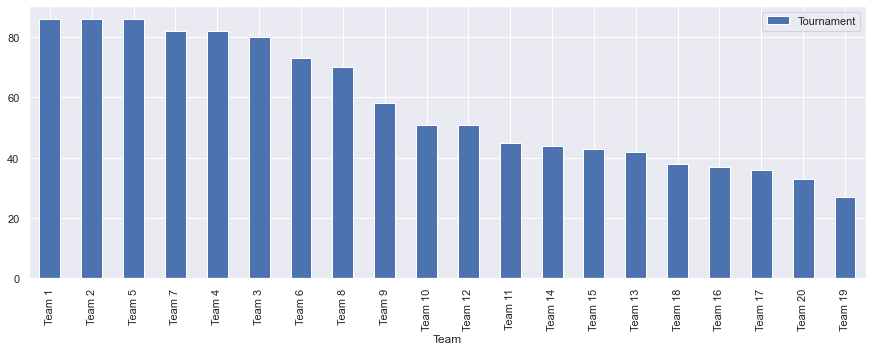

In [38]:
basketBallData.groupby(by=['Team'])['Tournament'].sum().reset_index().sort_values(['Tournament'], ascending=False).head(20).plot(x='Team',
                                                                                                               y='Tournament',
                                                                                                               kind='bar',
                                                                                                               figsize=(15,5))

**Top 20 teams based on the scores**

<AxesSubplot:xlabel='Team'>

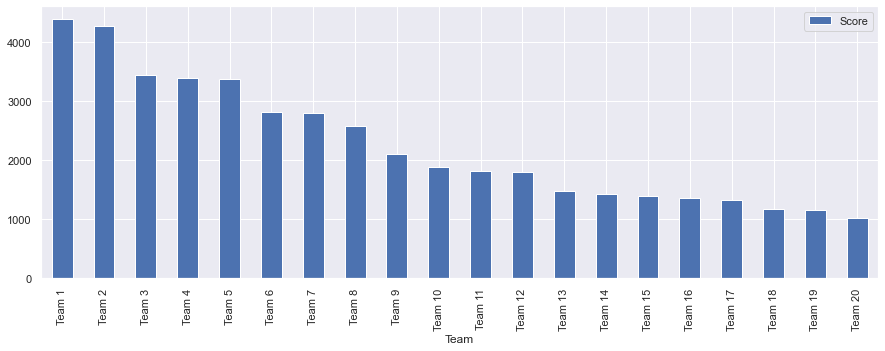

In [39]:
basketBallData.groupby(by=['Team'])['Score'].sum().reset_index().sort_values(['Score'], ascending=False).head(20).plot(x='Team',
                                                                                                     y='Score',
                                                                                                     kind='bar',
                                                                                                     figsize=(15,5))

**Top 20 teams based on the Win Percentage**

<AxesSubplot:xlabel='Team'>

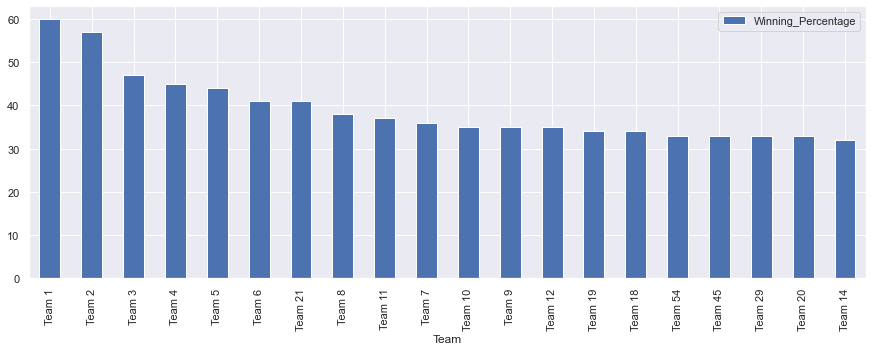

In [40]:
basketBallData.groupby(by=['Team'])['Winning_Percentage'].sum().reset_index().sort_values(['Winning_Percentage'], ascending=False).head(20).plot(x='Team', y='Winning_Percentage', kind='bar', figsize=(15,5))                                                

**Top 20 teams based on no. of basket scored**

<AxesSubplot:xlabel='Team'>

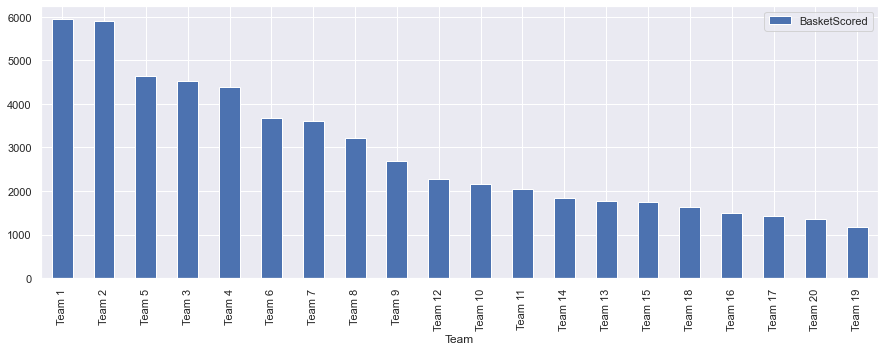

In [41]:
basketBallData.groupby(by=['Team'])['BasketScored'].sum().reset_index().sort_values(['BasketScored'], ascending=False).head(20).plot(x='Team',
                                                                                                                   y='BasketScored',
                                                                                                                   kind='bar',
                                                                                                                   figsize=(15,5))

**Top 20 teams based on no. of times they became tournament champion**

<AxesSubplot:xlabel='Team'>

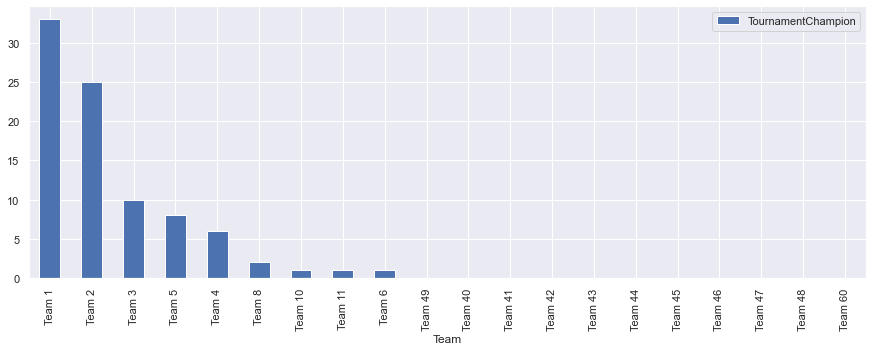

In [42]:
basketBallData.groupby(by=['Team'])['TournamentChampion'].sum().reset_index().sort_values(['TournamentChampion'], ascending=False).head(20).plot(x='Team',
                                                                                                                               y='TournamentChampion',
                                                                                                                               kind='bar',
                                                                                                                               figsize=(15,5))

**Worst 10 teams based on the percentage of games they have lost**

<AxesSubplot:xlabel='Team'>

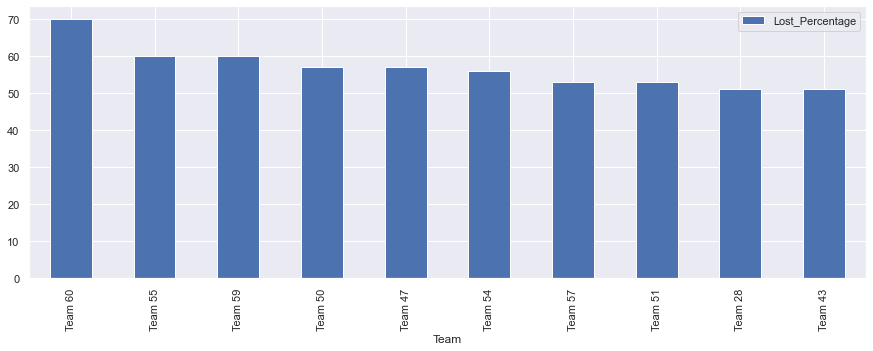

In [43]:
basketBallData.groupby(by=['Team'])['Lost_Percentage'].sum().reset_index().sort_values(['Lost_Percentage'], ascending=False).head(10).plot(x='Team',
                                                                                                                                          y='Lost_Percentage',
                                                                                                                                          kind='bar',
                                                                                                                                          figsize=(15,5))

**From the below pair plot, we can see the degree of correlation between different columns such as (Tournament, Score), (PlayedGames, WonGames) etc.**

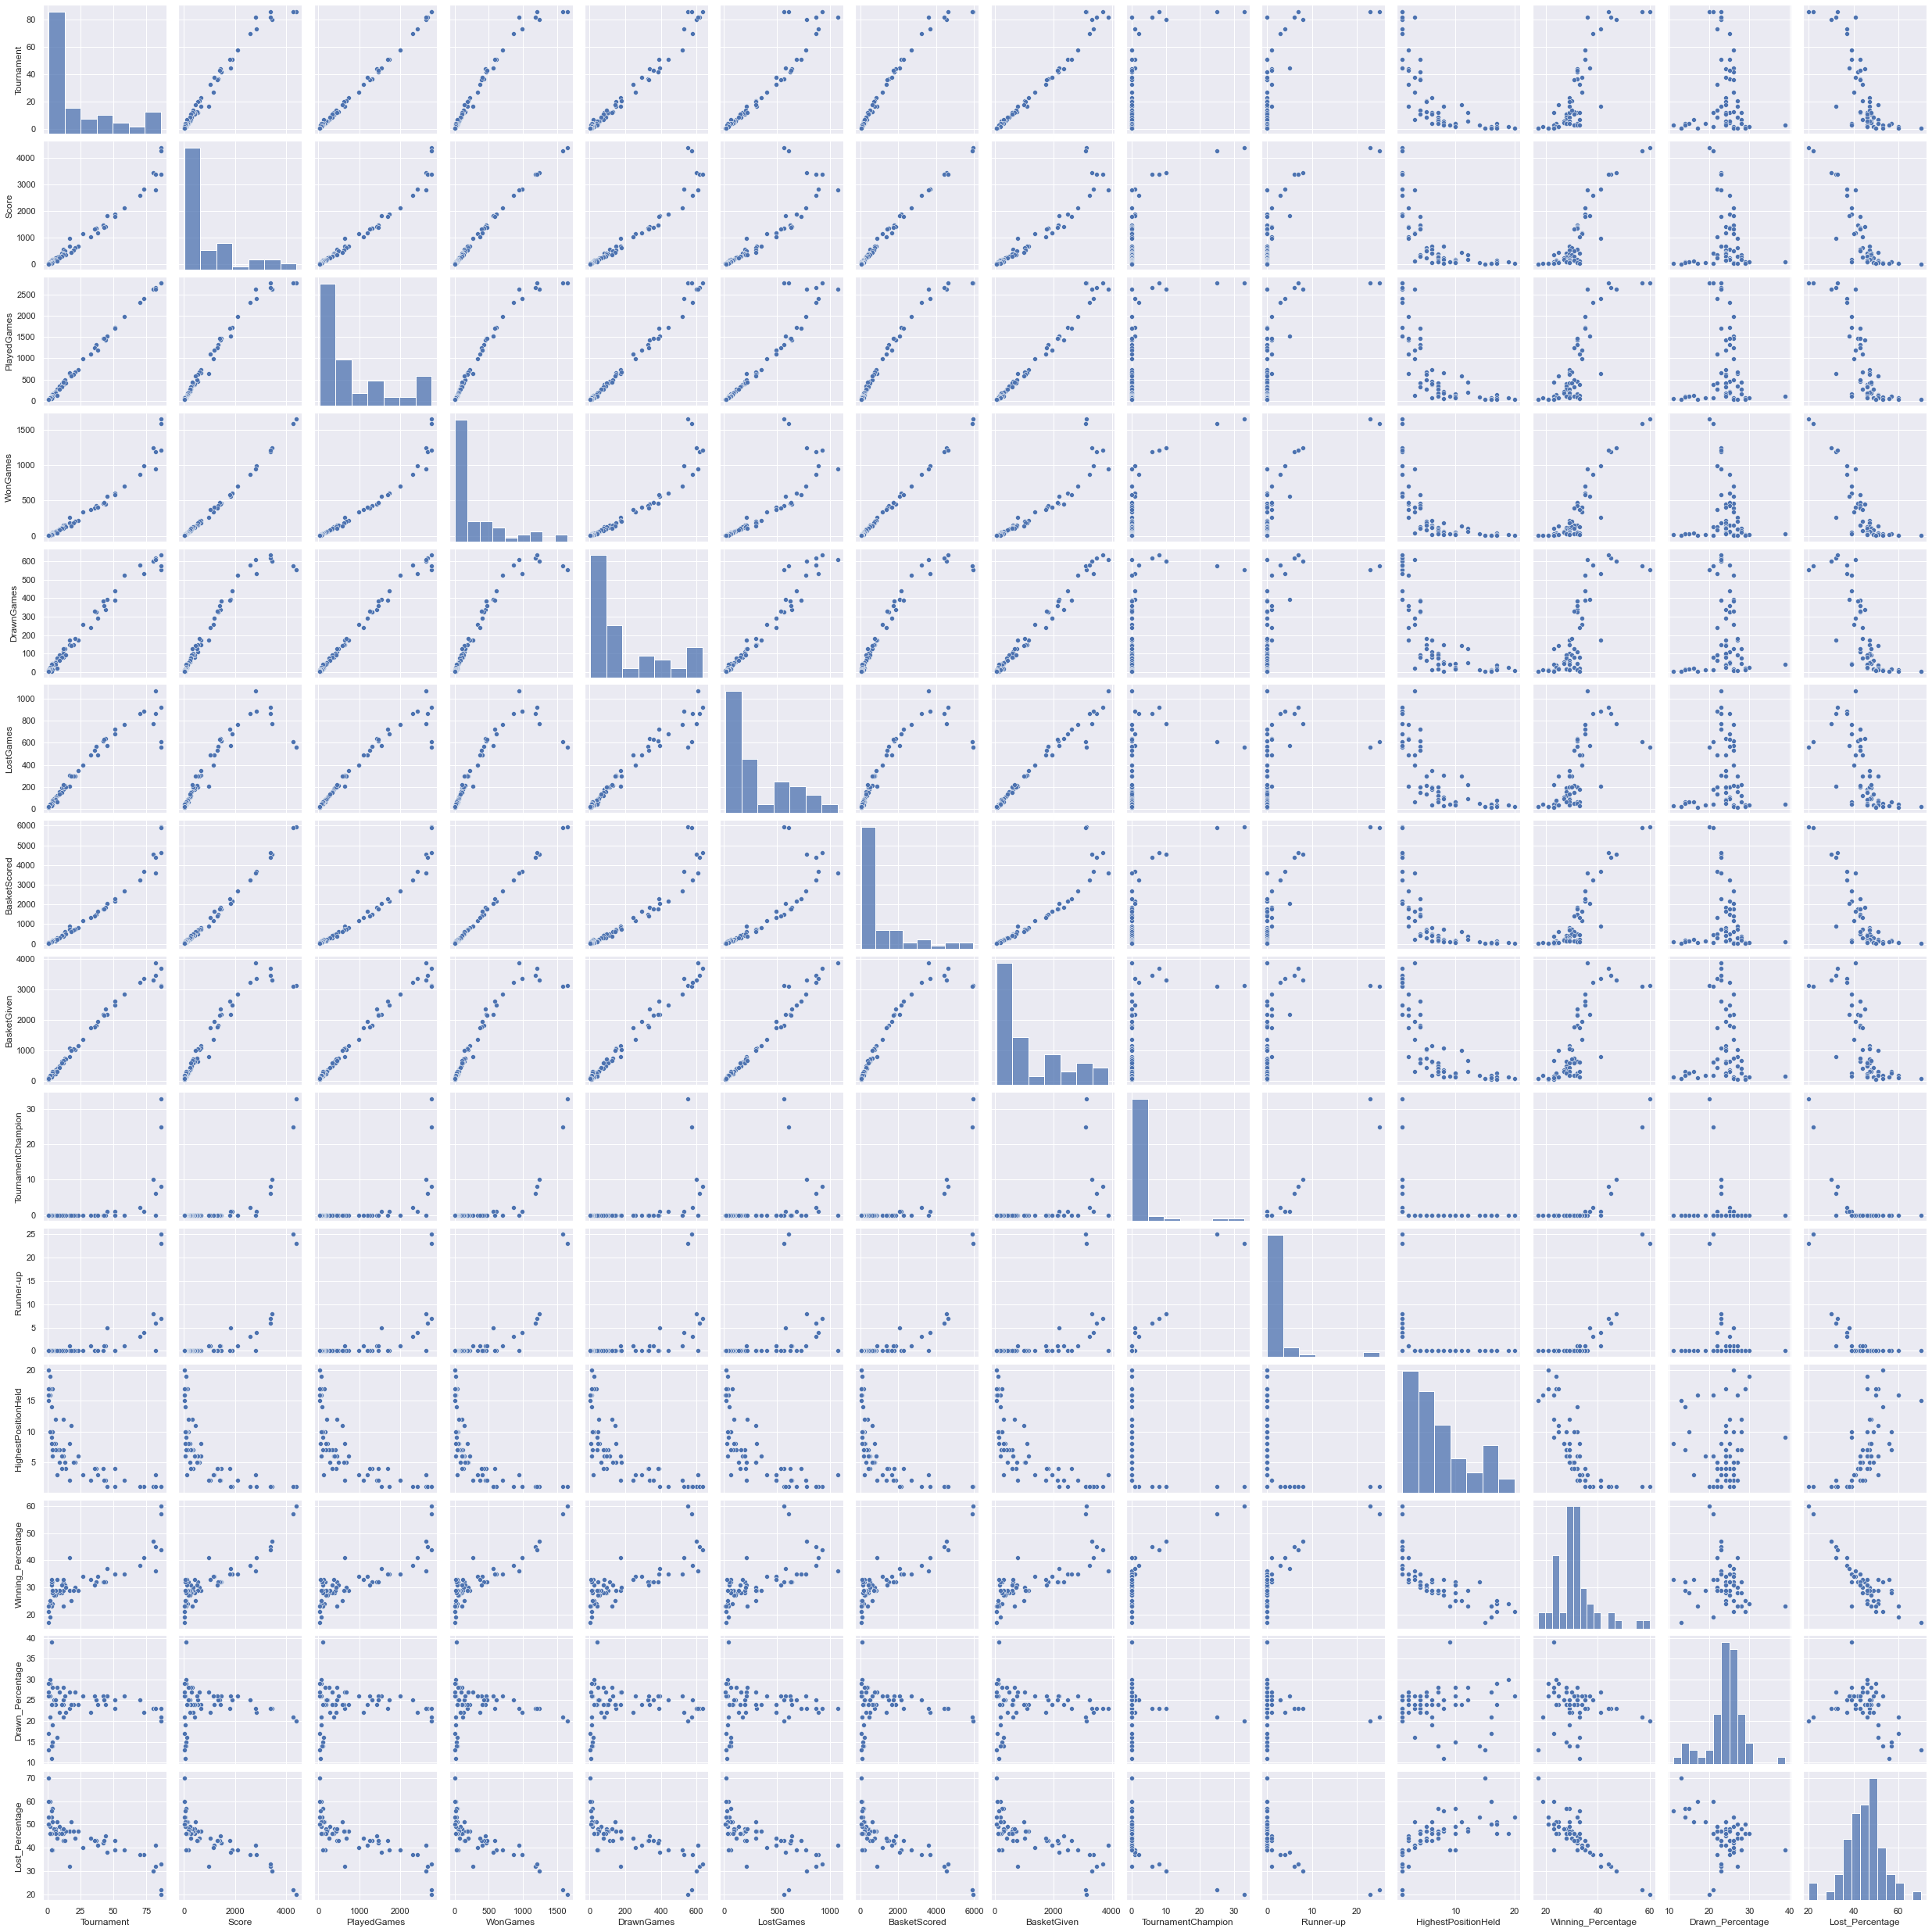

In [44]:
sns.pairplot(basketBallData)

**To get more precise information about the degree of correlation between different columns, we can use correlation table and 
heatmap**

In [45]:
basketBallData.corr()

Tournament     Score  PlayedGames  WonGames  DrawnGames  \
Tournament             1.000000  0.981258     0.998683  0.971749    0.989295   
Score                  0.981258  1.000000     0.979687  0.997232    0.958090   
PlayedGames            0.998683  0.979687     1.000000  0.967486    0.993972   
WonGames               0.971749  0.997232     0.967486  1.000000    0.939416   
DrawnGames             0.989295  0.958090     0.993972  0.939416    1.000000   
LostGames              0.949350  0.878780     0.955925  0.851436    0.972786   
BasketScored           0.974867  0.996634     0.969970  0.999312    0.942234   
BasketGiven            0.987781  0.943801     0.990020  0.925745    0.992479   
TournamentChampion     0.589304  0.715014     0.575072  0.752904    0.503378   
Runner-up              0.645924  0.764819     0.633101  0.797849    0.566021   
HighestPositionHeld   -0.708002 -0.669215    -0.711065 -0.647819   -0.720248   
Winning_Percentage     0.824481  0.882070     0.818181  0.888513    0.779798   
Drawn_Percentage      -0.005721 -0.014314     0.017729 -0.038719    0.065203   
Lost_Percentage       -0.762033 -0.811124    -0.768612 -0.804578   -0.757798   

                     LostGames  BasketScored  BasketGiven  TournamentChampion  \
Tournament            0.949350      0.974867     0.987781            0.589304   
Score                 0.878780      0.996634     0.943801            0.715014   
PlayedGames           0.955925      0.969970     0.990020            0.575072   
WonGames              0.851436      0.999312     0.925745            0.752904   
DrawnGames            0.972786      0.942234     0.992479            0.503378   
LostGames             1.000000      0.857843     0.985041            0.324025   
BasketScored          0.857843      1.000000     0.931079            0.743847   
BasketGiven           0.985041      0.931079     1.000000            0.471618   
TournamentChampion    0.324025      0.743847     0.471618            1.000000   
Runner-up             0.391645      0.791041     0.533448            0.971533   
HighestPositionHeld  -0.726172     -0.648672    -0.727323           -0.304307   
Winning_Percentage    0.670699      0.883489     0.762607            0.767491   
Drawn_Percentage      0.061889     -0.044635     0.018669           -0.134516   
Lost_Percentage      -0.654485     -0.796644    -0.717278           -0.642920   

                     Runner-up  HighestPositionHeld  Winning_Percentage  \
Tournament            0.645924            -0.708002            0.824481   
Score                 0.764819            -0.669215            0.882070   
PlayedGames           0.633101            -0.711065            0.818181   
WonGames              0.797849            -0.647819            0.888513   
DrawnGames            0.566021            -0.720248            0.779798   
LostGames             0.391645            -0.726172            0.670699   
BasketScored          0.791041            -0.648672            0.883489   
BasketGiven           0.533448            -0.727323            0.762607   
TournamentChampion    0.971533            -0.304307            0.767491   
Runner-up             1.000000            -0.359191            0.802830   
HighestPositionHeld  -0.359191             1.000000           -0.737742   
Winning_Percentage    0.802830            -0.737742            1.000000   
Drawn_Percentage     -0.122242             0.044550           -0.142675   
Lost_Percentage      -0.680070             0.658436           -0.854332   

                     Drawn_Percentage  Lost_Percentage  
Tournament                  -0.005721        -0.762033  
Score                       -0.014314        -0.811124  
PlayedGames                  0.017729        -0.768612  
WonGames                    -0.038719        -0.804578  
DrawnGames                   0.065203        -0.757798  
LostGames                    0.061889        -0.654485  
BasketScored                -0.044635        -0.796644  
BasketGiven           

<AxesSubplot:>

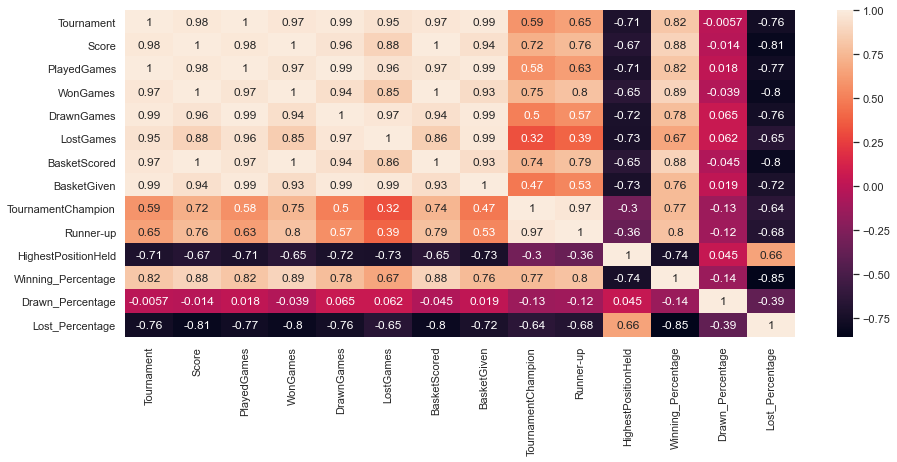

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(basketBallData.corr(), annot=True)

**Based on the above analysis and visualisations, we can recommend Team 1, Team 2, Team 5, Team 3, Team 4 and Team 7 which will be a deal win for them**

**Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future.**

* While colleciting the data, the Team launch year should have been uniform. Instead of using special characters to denote the period of the team launch years, only the end year of team launch should be given.
* "-" in the Teams Champion and Runner-up columns create confusion whether the data for these columns are missing/unknown for the team or they are zero(i.e. The team haven't become champion or runner up even once). So, we had to consider that the teams with "-" in "TeamChampion" and "Runner-up" clumns haven't reached the final even once and replace "-" with zero. If in reality any of those teams would have been Tournament Champion then it has affected our analysis.

# Part Three

## 1. Import the data

In [47]:
data = pd.read_csv('DS - Part3 - CompanyX_EU.csv')
startupsData = data.copy(deep=True)

## 2. Data exploration

**Look at the first 5 rows of data**

In [48]:
startupsData.head()

Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

**Shape of the data. Data has 662 rows and 6 columns**

In [49]:
startupsData.shape

(662, 6)

**Information about the datatype of the attributes and also we can see there are few missing data in *Product and Funding* columns**

In [50]:
startupsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


## 3. Data preprocessing & visualisation 

**Drop the null values**

In [51]:
startupsData.dropna(inplace=True)

In [52]:
startupsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [53]:
startupsData.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  
1        Contestant         Closed  
3   Audience choice      Operating  
5        Contestant       Acquired  
6          Finalist      Operating  
10       Contestant      Operating

**Convert the ‘Funding’ features to a numerical value**

In [54]:
def convert_funding_to_num(funding):
    conversion_map = {'K':1000, 'M':1000000, 'B':1000000000}
    
    temp_funding = []
    
    for fund in funding:
        if fund.isdigit():
            temp_funding.append(float(fund))
        else:
            temp_funding.append(float(fund[1:-1]) * conversion_map.get(fund[-1].upper()))
    return temp_funding

In [55]:
startupsData['Funding($)'] = convert_funding_to_num(startupsData['Funding'])

In [56]:
startupsData.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  Funding($)  
1        Contestant         Closed    630000.0  
3   Audience choice      Operating   1000000.0  
5        Contestant       Acquired  19300000.0  
6          Finalist      Operating  29000000.0  
10       Contestant      Operating   1800000.0

In [57]:
def convert_funding_to_million(funding):
    temp_funding = []
    for fund in funding:
        temp_funding.append(fund/1000000)
    return temp_funding

In [58]:
startupsData['Funding in million'] = convert_funding_to_million(startupsData['Funding($)'])

In [59]:
startupsData.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  Funding($)  Funding in million  
1        Contestant         Closed    630000.0                0.63  
3   Audience choice      Operating   1000000.0                1.00  
5        Contestant       Acquired  19300000.0               19.30  
6          Finalist      Operating  29000000.0               29.00  
10       Contestant      Operating   1800000.0                1.80

**Plot box plot for funds in million**

<AxesSubplot:xlabel='Funding in million'>

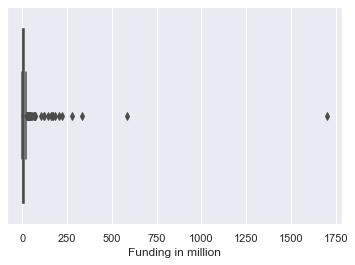

In [60]:
sns.boxplot(x=startupsData['Funding in million'])

**Mean**

In [61]:
startupsData['Funding in million'].mean()

17.241488565022443

**Mode**

In [62]:
startupsData['Funding in million'].mode()

0    1.0
dtype: float64

**Median**

In [63]:
startupsData['Funding in million'].median()

2.2

**Quantile 25%**

In [64]:
Q1 = startupsData['Funding in million'].quantile(q=0.25)
Q1

0.74525

**Quantile 50%**

In [65]:
Q2 = startupsData['Funding in million'].quantile(q=0.50)
Q2

2.2

**Quantile 75%**

In [66]:
Q3 = startupsData['Funding in million'].quantile(q=0.75)
Q3

9.475

**Lower fence from the box plot**

In [67]:
IQR = Q3 - Q1

lowerFence = Q1 - 1.5*IQR

print('Lower fence for the box plot: ', lowerFence)

Lower fence for the box plot:  -12.349374999999998


**Check number of outliers greater than upper fence**

In [68]:
upperFence = Q3 + 1.5*IQR

startupsData[startupsData['Funding in million'] > upperFence]['Funding in million'].count()

60

**Drop the values that are greater than upper fence**

In [69]:
startupsData.shape

(446, 8)

In [70]:
startupsData.drop(startupsData[startupsData['Funding in million'] > upperFence].index, inplace=True)

**Plot the box plot after dropping the values**

<AxesSubplot:xlabel='Funding in million'>

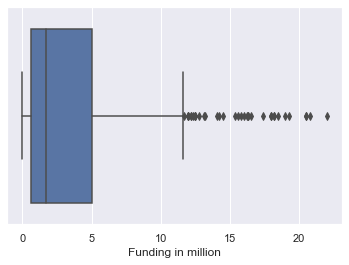

In [71]:
sns.boxplot(x=startupsData['Funding in million'])

**Check frequency of the OperatingState features classes**

In [72]:
startupsData['OperatingState'].value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

<AxesSubplot:xlabel='OperatingState', ylabel='count'>

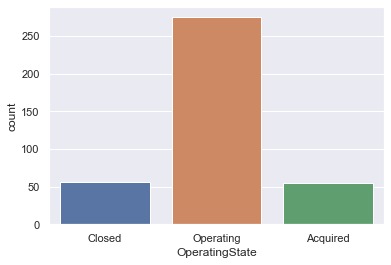

In [73]:
sns.countplot(x=startupsData['OperatingState'])

**Plot a distribution plot for Funds in million**

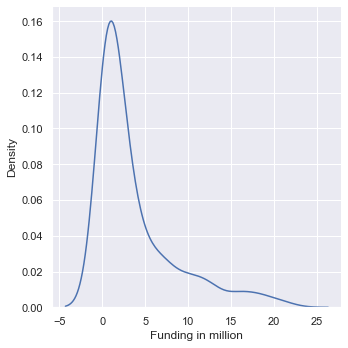

In [74]:
#Distribution plot without removal of the outliers
sns.displot(startupsData['Funding in million'], kind='kde')

**Plot distribution plots for companies still operating and companies that closed**

In [75]:
#Filter the data for companies which are either operating or closed
startupsDataOperatingorClosed = startupsData[(startupsData['OperatingState'] == 'Operating') | (startupsData['OperatingState'] == 'Closed')]

In [76]:
startupsDataOperatingorClosed.head()

Startup         Product Funding                      Event  \
1         3DLT        3dlt.com   $630K           Disrupt NYC 2013   
3   3Dprintler  3dprintler.com     $1M            Disrupt NY 2016   
10  AdhereTech  adheretech.com   $1.8M  Hardware Battlefield 2014   
11    AdRocket    adrocket.com     $1M                  TC50 2008   
13    Agrilyst    agrilyst.com     $1M            Disrupt SF 2015   

             Result OperatingState  Funding($)  Funding in million  
1        Contestant         Closed    630000.0                0.63  
3   Audience choice      Operating   1000000.0                1.00  
10       Contestant      Operating   1800000.0                1.80  
11       Contestant         Closed   1000000.0                1.00  
13           Winner      Operating   1000000.0                1.00

In [77]:
startupsDataOperatingorClosed.shape

(331, 8)

<Figure size 1080x360 with 0 Axes>

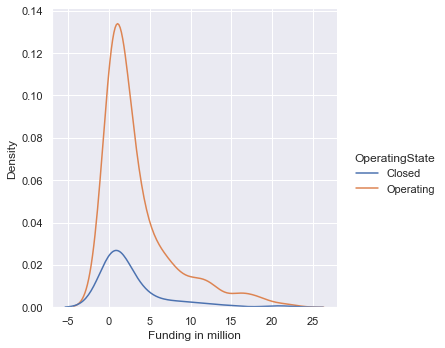

In [78]:
plt.figure(figsize=(15,5))
sns.displot(data=startupsDataOperatingorClosed, x='Funding in million', hue='OperatingState', kind='kde')

## 4. Statistical analysis

**Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?**

H0: There is no difference between funds raised by companies that are still operating and companies that closed down.<br/>
i.e. Funds raised by operational companies = Funds raised by closed companies

Ha: There is difference between funds raised by companies that are still operating and companies that closed down.<br/>
i.e. Funds raised by operational companies != Funds raised by closed companies

In [92]:
#Assumption
significance_level = 0.05

sample1 = startupsData[startupsData['OperatingState'] == 'Operating']['Funding in million']
sample2 = startupsData[startupsData['OperatingState'] == 'Closed']['Funding in million']

t_stat, p_value = stats.ttest_ind(sample1, sample2)

if p_value < significance_level:
    print(f'As the p_value {round(p_value, 4)} <= {significance_level} alpha, we reject the null hypothesis')
else:
    print(f'As the p_value {round(p_value, 4)} > {significance_level} alpha, we fail to reject null hypothesis')

As the p_value 0.1932 > 0.05 alpha, we fail to reject null hypothesis


**Make a copy of the original data frame**

In [80]:
startupsData2 = data.copy(deep=True)

**Check frequency distribution of Result variable**

In [81]:
startupsData2['Result'].value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

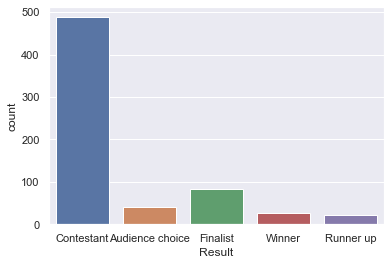

In [82]:
sns.countplot(x=startupsData2['Result'])

**Calculate percentage of winners that are still operating and percentage of contestants that are still operating**
<br/>As There are 488 contestants, we can consider the rest as winner.

Percentage of winners that are still operating:

In [83]:
winners = startupsData2['Result'].value_counts().sum() - startupsData2['Result'].value_counts()['Contestant']

operating_winner = startupsData2[startupsData2['OperatingState'] == 'Operating']['Result'].value_counts().sum() - startupsData2[startupsData2['OperatingState'] == 'Operating']['Result'].value_counts()['Contestant']

operating_winner/winners

0.764367816091954

Percentage of contestants that are still operating:

In [84]:
contestant = startupsData2['Result'].value_counts()['Contestant']

operating_contestant = startupsData2[startupsData2['OperatingState'] == 'Operating']['Result'].value_counts()['Contestant']

operating_contestant/contestant

0.680327868852459

**Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:**

H0: The proportion of companies operating between winners and contestants are same.<br/>
i.e. Proportion of winner operating company = Proportion of contestant operating company.

Ha: The proportion of companies operating between winners and contestants are not same.<br/>
i.e. Proportion of winner operating company != Proportion of contestant operating company.

In [85]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05

test_stat, p_value = proportions_ztest([operating_contestant, operating_winner], [contestant, winners])

test_stat, p_value

(-2.0818033900737642, 0.037360431984547006)

In [86]:
if p_value <= significance_level:
    print(f'p_value: {round(p_value, 4)} <= {significance_level} significance level, so we reject the null hypothesis')
else:
    print(f'p_value: {round(p_value, 4)} > {significance_level} significance level, so we fail to reject null hypothesis')

p_value: 0.0374 <= 0.05 significance level, so we reject the null hypothesis


**Check distribution of the Event variable**

In [87]:
startupsData2['Event'].value_counts()

TC50 2008                    52
TC50 2009                    50
TC40 2007                    40
Disrupt NYC 2011             32
Disrupt NYC 2013             31
Disrupt SF 2013              31
Disrupt SF 2011              31
Disrupt SF 2012              30
Disrupt NYC 2012             30
Disrupt SF 2014              28
Disrupt SF 2015              27
Disrupt NYC 2014             27
Disrupt SF 2010              26
Disrupt SF 2016              26
Disrupt NY 2015              26
Disrupt NY 2016              22
Disrupt NYC 2010             22
Disrupt Beijing 2011         18
Hardware Battlefield 2015    15
Disrupt EU 2014              15
Disrupt London 2015          15
Disrupt EU 2013              15
Hardware Battlefield 2014    14
Hardware Battlefield 2016    13
-                            13
Disrupt London 2016          13
Name: Event, dtype: int64

**Select only the Event that has disrupt keyword from 2013 onwards**

In [88]:
startupsData2[startupsData2['Event'].apply(lambda event: 'Disrupt' in event and int(event[-4:]) > 2012)]['Event']

0          Disrupt SF 2013
1         Disrupt NYC 2013
2          Disrupt SF 2016
3          Disrupt NY 2016
4         Disrupt NYC 2013
              ...         
646    Disrupt London 2015
648    Disrupt London 2015
653        Disrupt EU 2014
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 276, dtype: object

**Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards**

H0: The average funds raised by companies across NY, SF and EU events from 2013 onwards are same.
<br/>
i.e. Average funds raised by companies across NY event from 2013 = Average funds raised by companies across SF event from 2013 = Average funds raised by companies across EU event from 2013
<br/>
Ha: The average funds raised by companies across NY, SF and EU events from 2013 onwards are not same.


In [89]:
funds_NY = startupsData[startupsData['Event'].apply(lambda event: 'NY' in event and int(event[-4:]) > 2012)]['Funding in million']
funds_SF = startupsData[startupsData['Event'].apply(lambda event: 'SF' in event and int(event[-4:]) > 2012)]['Funding in million']
funds_EU = startupsData[startupsData['Event'].apply(lambda event: 'EU' in event and int(event[-4:]) > 2012)]['Funding in million']

significance_level = 0.05

test_stat, p_value = stats.f_oneway(funds_NY, funds_SF, funds_EU)

test_stat, p_value

(0.4623934512239188, 0.6306082074707854)

In [90]:
if p_value <= significance_level:
    print(f'p_value: {round(p_value, 4)} <= {significance_level} significance level, hence reject the null hypothesis')
else:
    print(f'p_value: {round(p_value, 4)} > {significance_level} significance level, hence fail to reject null hypothesis')

p_value: 0.6306 > 0.05 significance level, hence fail to reject null hypothesis


**Plot the distribution plot comparing the 3 city events**

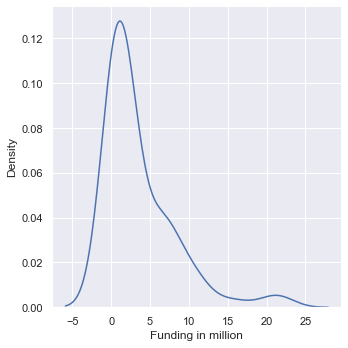

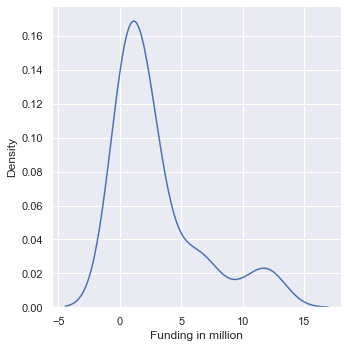

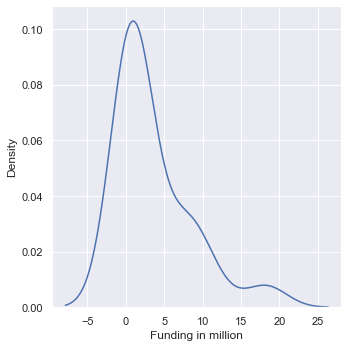

In [91]:
sns.displot(x=funds_NY, kind='kde')
sns.displot(x=funds_SF, kind='kde')
sns.displot(x=funds_EU, kind='kde')

## 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

* Due to missing values in the given data, post dropping the missing values we lost 216 rows. Which if not dropped would have added towards the accuracy of the analysis.